# Telco Churn Project 

# Goal: 

    - Find drivers for customer churn at Telco. Why are customers churning?

    - Construct a ML classification model that accurately predicts customer churn

    - Present your process and findings to the lead data scientist

# Imports 

In [1]:
#standard ds libraries
import pandas as pd
import numpy as np

# vizualization
import matplotlib.pyplot as plt
import seaborn as sns

# stats testing 
from scipy import stats

#import SQL path
import env 
import os

# defined funtions  
from acquisition import get_telco_data
from acquisition import prep_telco
from acquisition import split_telco_data
import explore
import modeling as m

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split # was in my prepare.py 
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Acquire

- Data acquired from MySQL
- Its contains 7043 rows and 24 columns before cleaning
- Each row represents customer, service, or account data
- Each column represents a feature of those games

# Prepare

Prepare Actions:

- Removed columns that did not contain useful information (duplicate columns)
- Checked for nulls in the data (there were internet service type)
- Removed '(automatic)' from payment types for better visualization
- Replaced every categorical lable with a numerical lable (gender, Partner, Dependents, PaperlessBilling, PhoneService , and Churn)
- Created dummy dataframe for categorical variables with more than 2 options. Creating a new binary column for each. 
- Concatenated the dummy dataframe to the original dataframe. 
- Removed white space from values in object columns
- Split data into train, validate and test 

# Data Dictionary 

| Feature      | Definition             |  
|--------------|------------------------|
| Contract Type | month to month, one year, or two year|
| Payment Type      | mailed check, Electronic Check, Credit Card, Bank Transfer |

In [2]:
# acquiring the data and preping the data 
df = get_telco_data()
df = prep_telco(df)
# spliting the data 
train, validate, test = split_telco_data(df)

# A breif look at the data

In [3]:
train.head().T

,2198,2613,5714,173,3218
customer_id,3148-AOIQT,3722-WPXTK,8049-WJCLQ,0278-YXOOG,4615-PIVVU
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,0,0
partner,Yes,No,Yes,No,No
dependents,No,No,Yes,No,No
tenure,69,1,10,5,42
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,Yes,No,No,No,No
online_security,No internet service,No,No,No internet service,No
online_backup,No internet service,No,No,No internet service,No


## A summary of the data 

In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,3943.0,0.161552,0.368086,0.00,0.000,0.0,0.000,1.00
tenure,3943.0,32.256150,24.611911,0.00,9.000,28.0,55.000,72.00
monthly_charges,3943.0,64.749467,30.204392,18.25,35.275,70.3,89.950,118.75
total_charges,3943.0,2275.070074,2285.691469,0.00,386.200,1380.1,3722.775,8672.45
gender_encoded,3943.0,0.492265,0.500004,0.00,0.000,0.0,1.000,1.00
partner_encoded,3943.0,0.489221,0.499947,0.00,0.000,0.0,1.000,1.00
dependents_encoded,3943.0,0.302054,0.459207,0.00,0.000,0.0,1.000,1.00
phone_service_encoded,3943.0,0.901598,0.297896,0.00,1.000,1.0,1.000,1.00
paperless_billing_encoded,3943.0,0.588892,0.492097,0.00,0.000,1.0,1.000,1.00
churn_encoded,3943.0,0.267816,0.442878,0.00,0.000,0.0,1.000,1.00


# Explore

/var/folders/6d/_03p2v5j0rd067n1f34klb7w0000gn/T/ipykernel_50714/701831122.py:11: UserWarning: The figure layout has changed to tight
  fig.tight_layout(h_pad=7)


<Figure size 5000x4000 with 0 Axes>

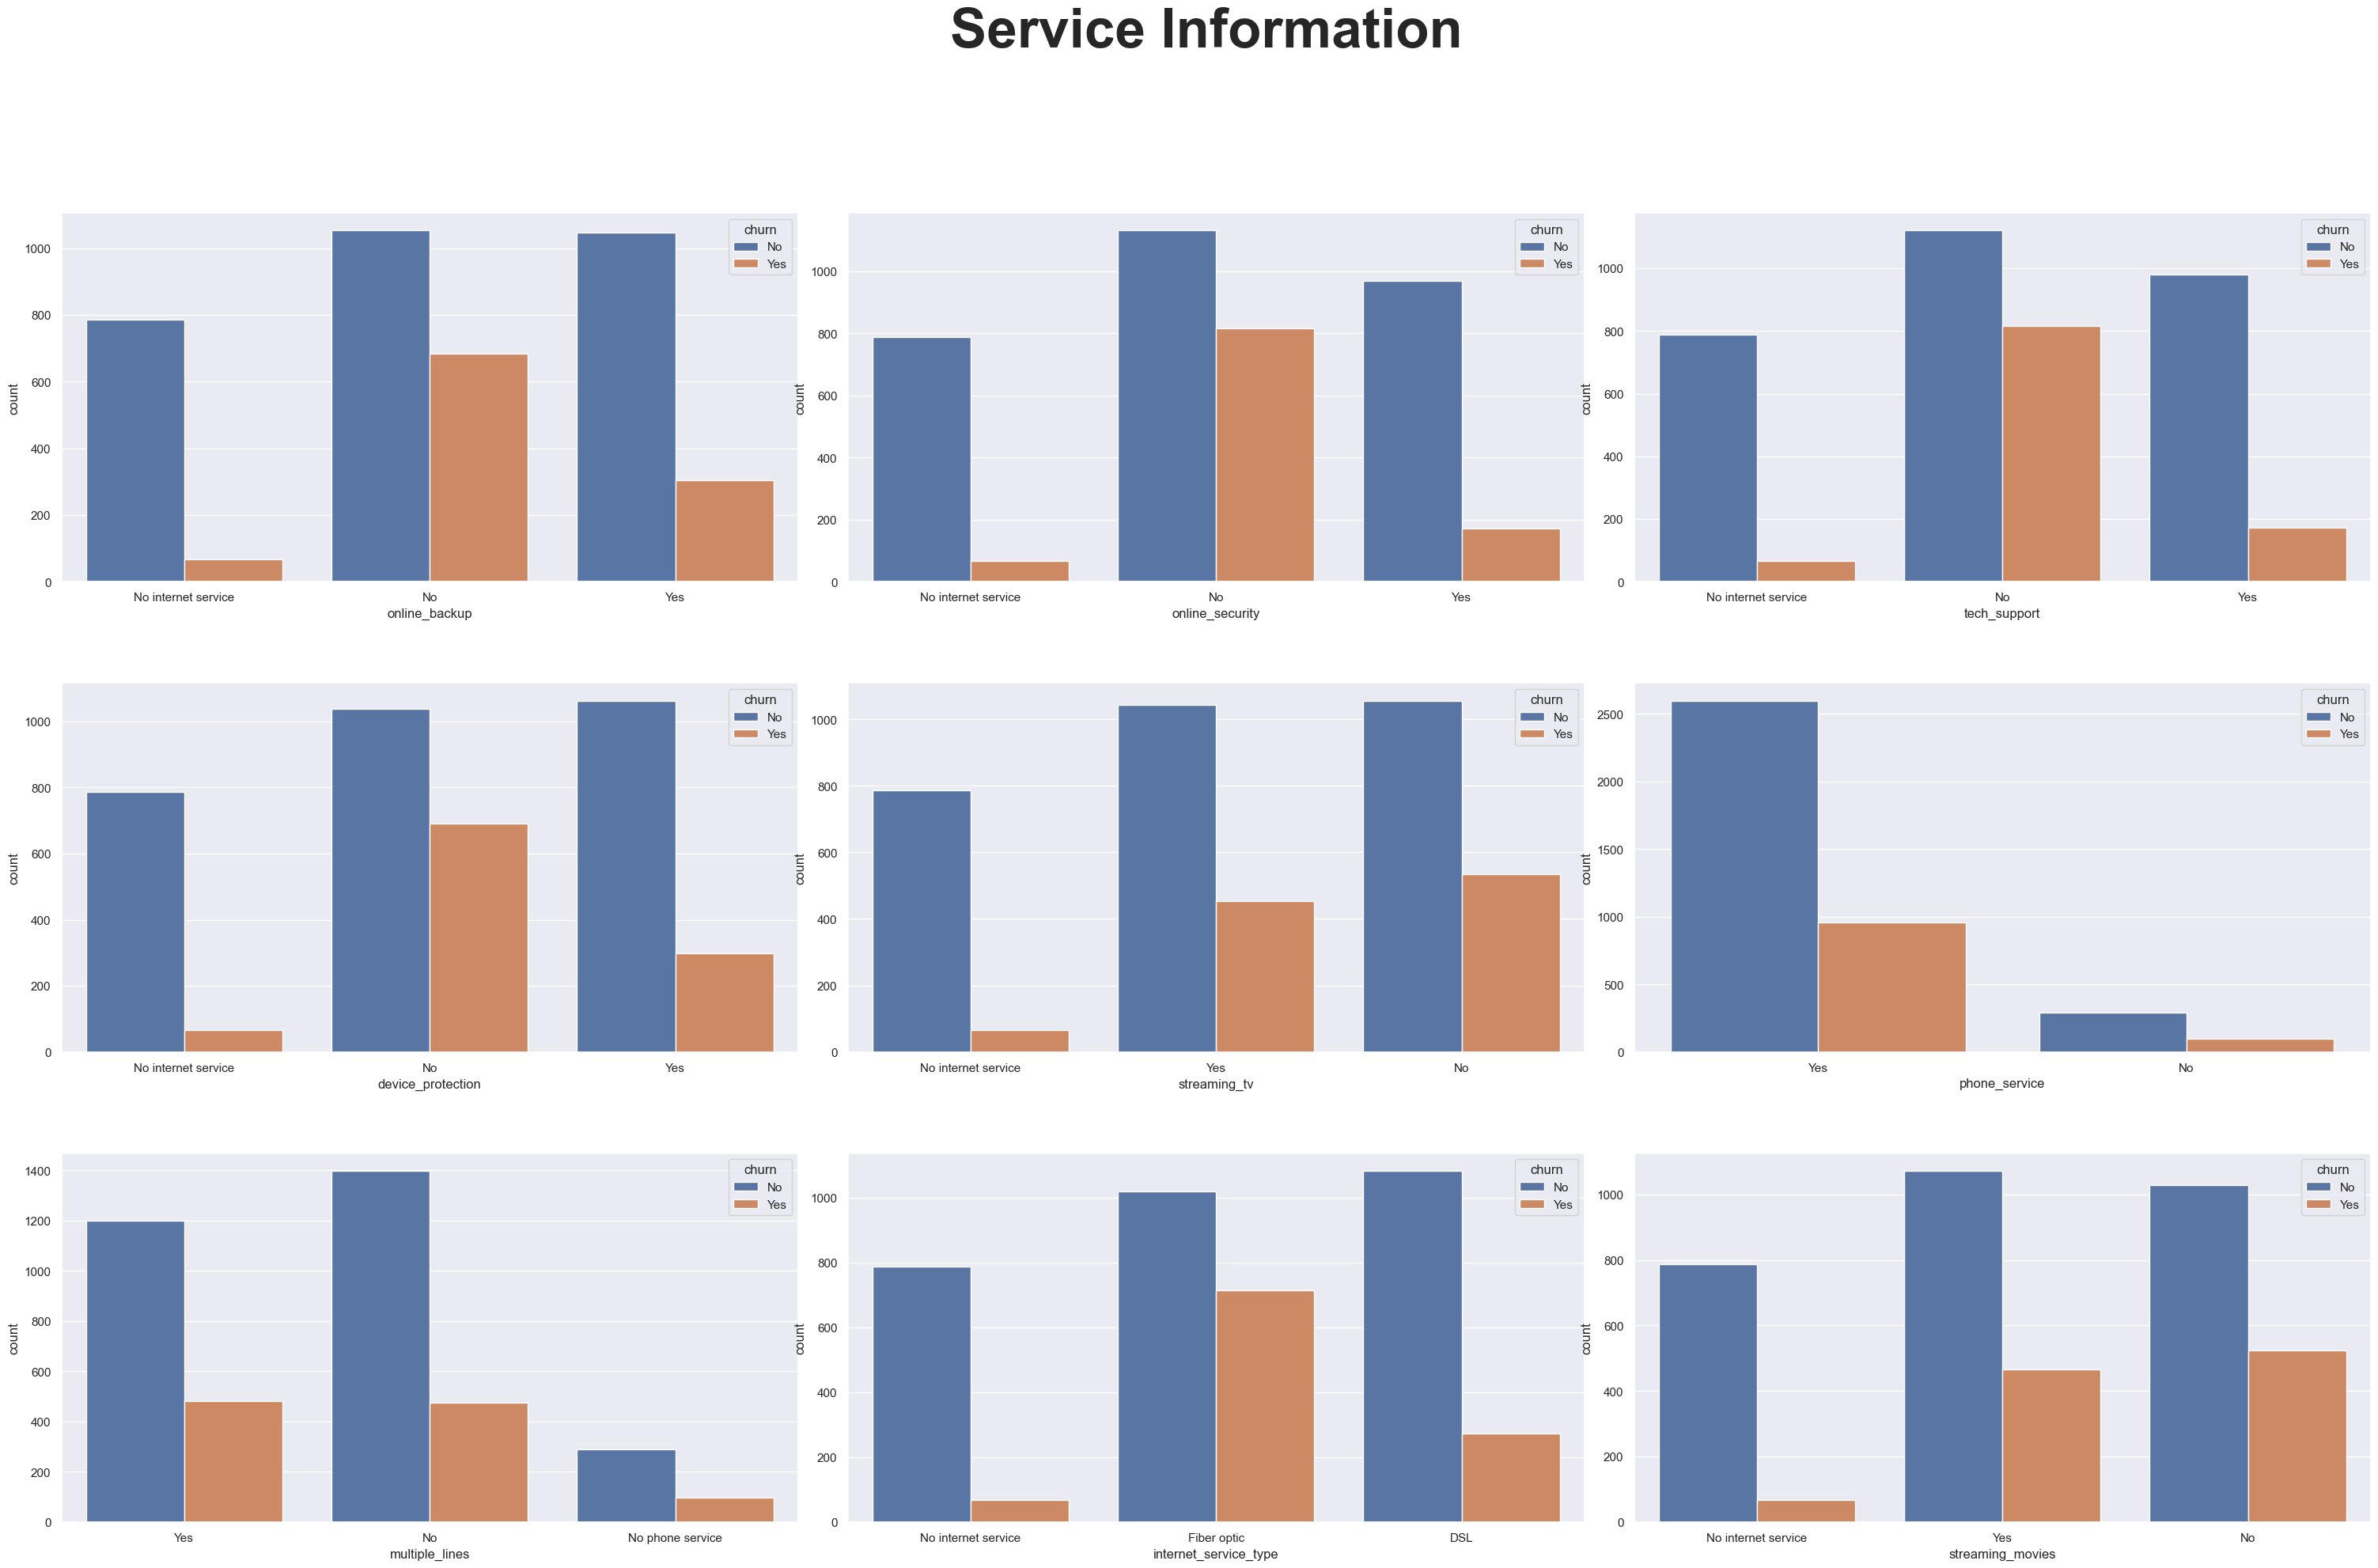

In [28]:
#set seaborn plotting aesthetics as default
fig = plt.figure(figsize=(50, 40)) 
plt.rcParams['savefig.facecolor'] = "0.4"
plt.rcParams['figure.figsize'] = 30., 20.
plt.rcParams['figure.max_open_warning'] = 500

sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, layout="constrained")
fig.tight_layout(h_pad=7)



#create boxplot in each subplot
sns.countplot(data=train, hue='churn', x='online_backup', ax=axes[0,0])
sns.countplot(data=train, hue='churn', x='online_security', ax=axes[0,1])
sns.countplot(data=train, hue='churn', x='tech_support', ax=axes[0,2])
sns.countplot(data=train, hue='churn', x='device_protection', ax=axes[1,0])
sns.countplot(data=train, hue='churn', x='streaming_tv', ax=axes[1,1])
sns.countplot(data=train, hue='churn', x='phone_service', ax=axes[1,2])
sns.countplot(data=train, hue='churn', x='multiple_lines', ax=axes[2,0])
sns.countplot(data=train, hue='churn', x='internet_service_type', ax=axes[2,1])
sns.countplot(data=train, hue='churn', x='streaming_movies', ax=axes[2,2])


fig.suptitle('Service Information', fontweight='bold', size=50)
plt.subplots_adjust(top=0.85)

/var/folders/6d/_03p2v5j0rd067n1f34klb7w0000gn/T/ipykernel_50714/1240789642.py:11: UserWarning: The figure layout has changed to tight
  fig.tight_layout(h_pad=7)


<Figure size 5000x4000 with 0 Axes>

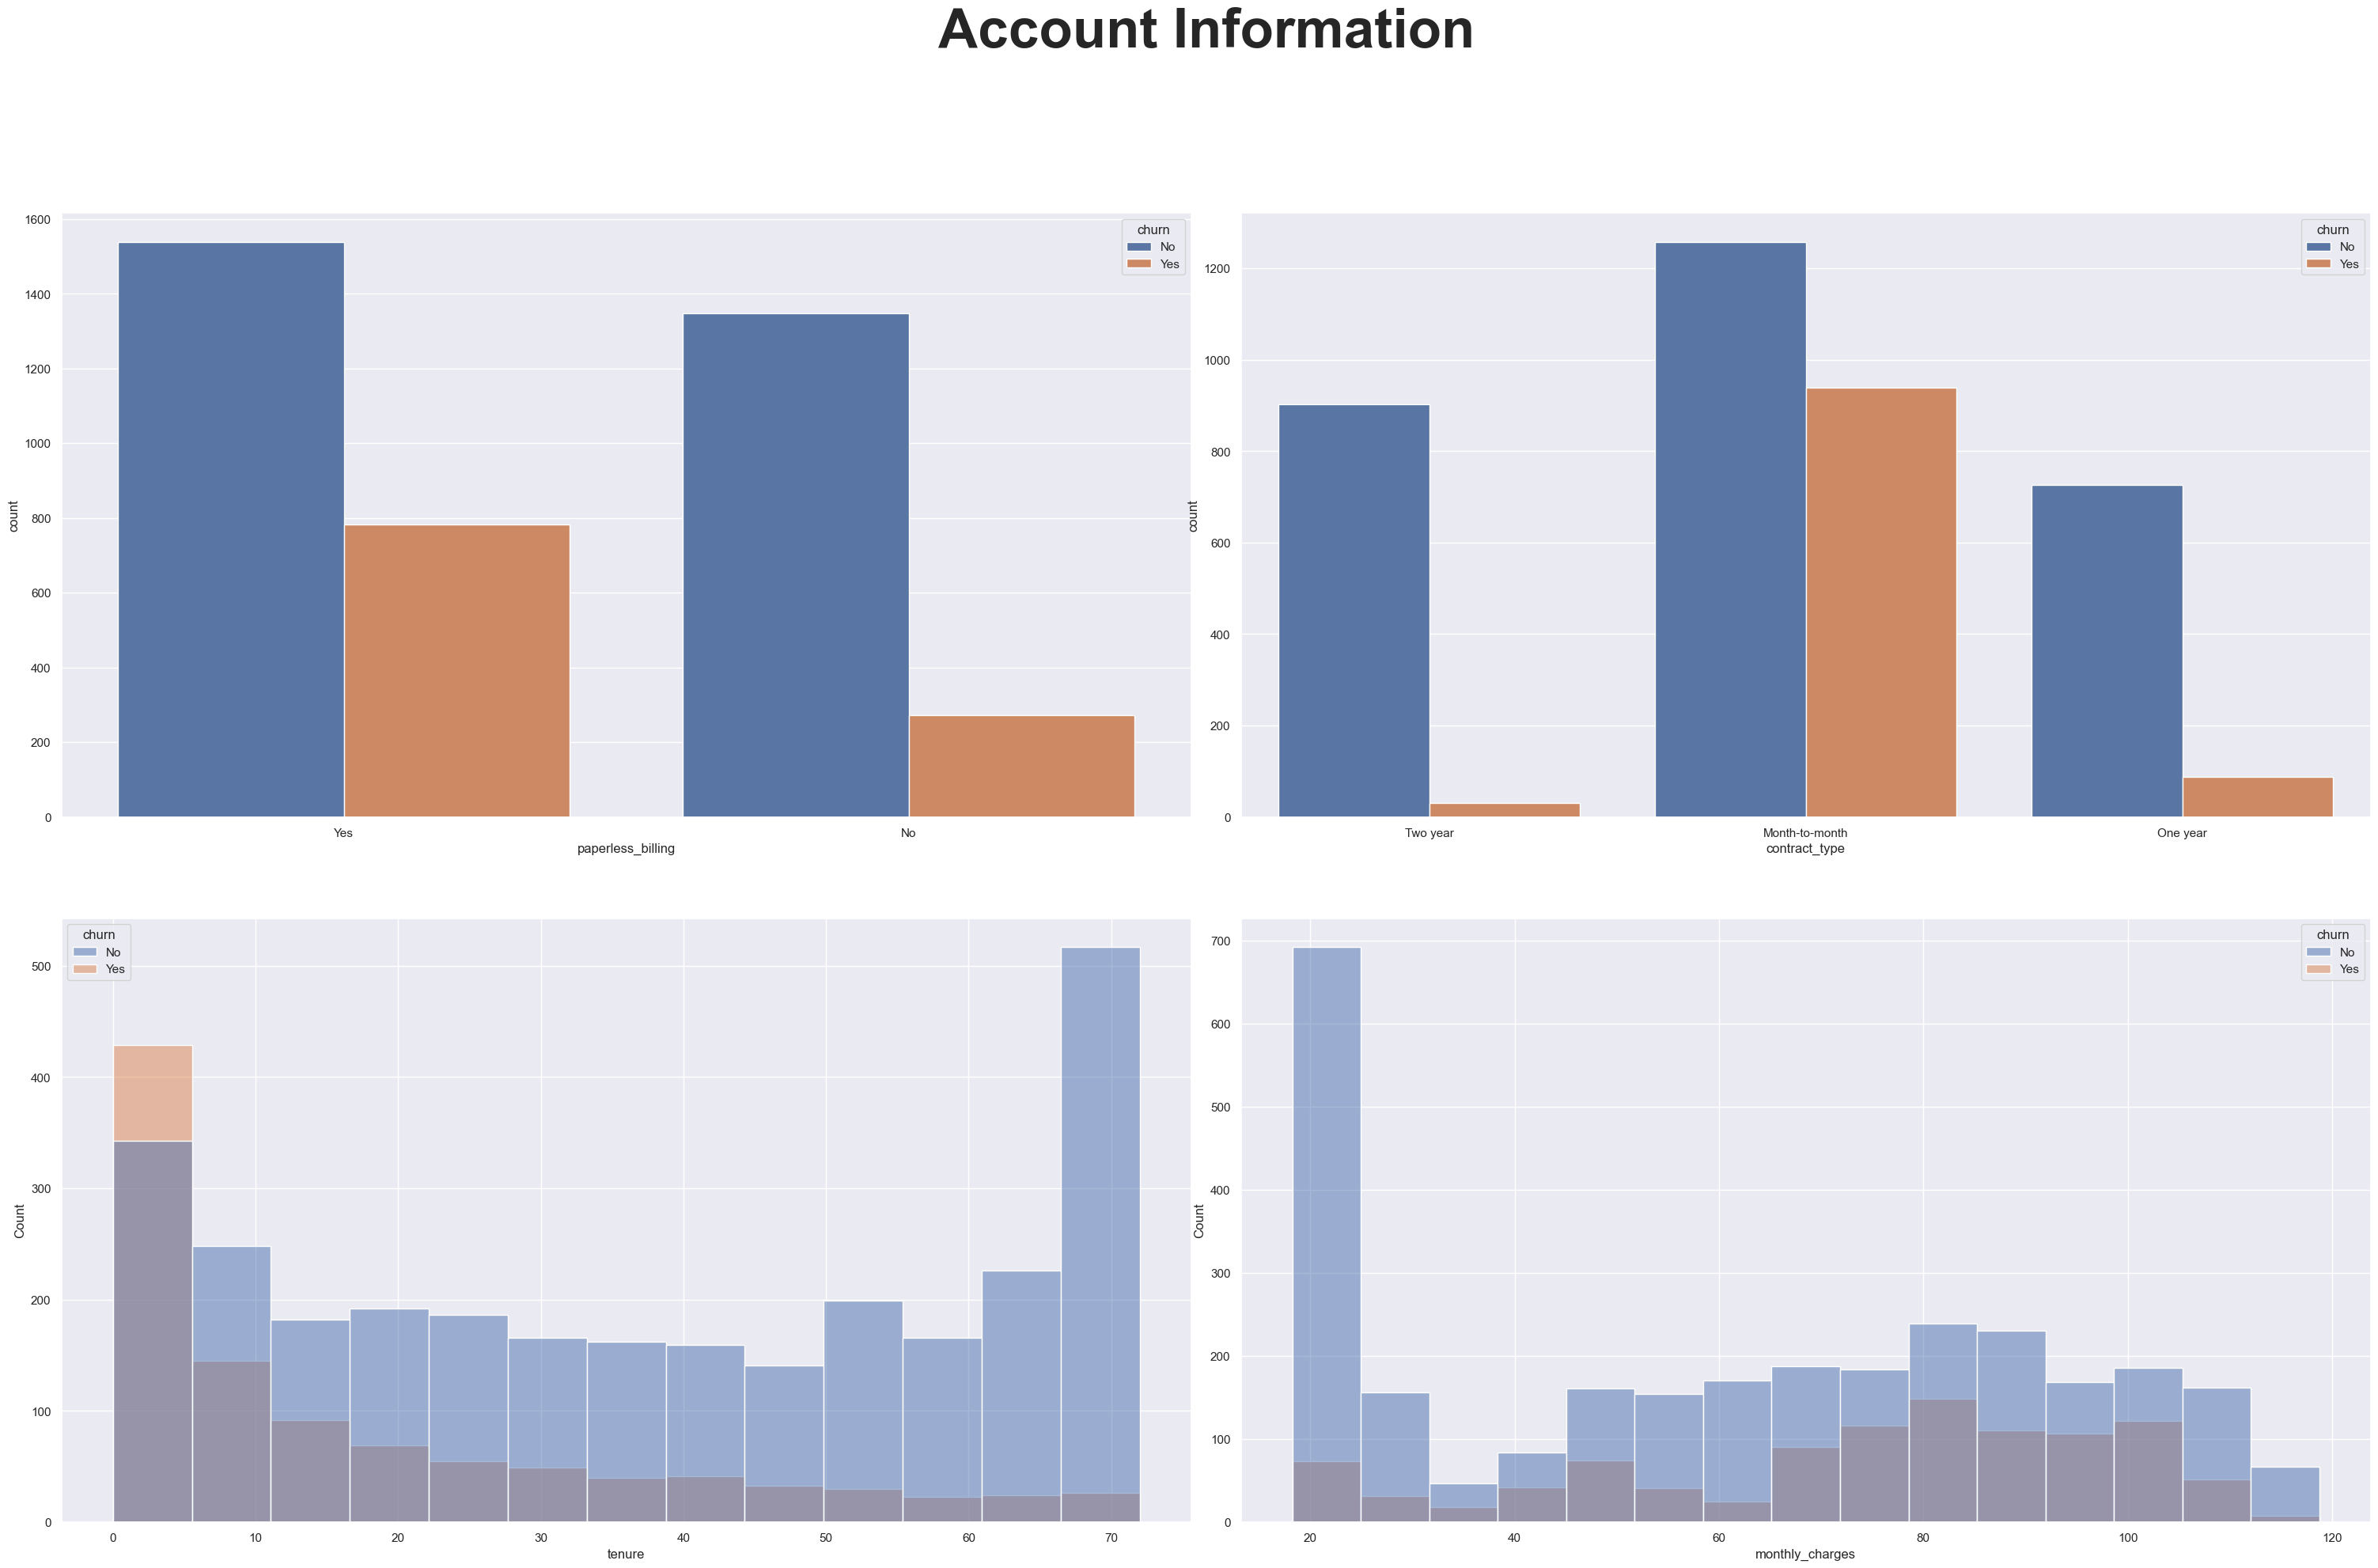

In [29]:
#set seaborn plotting aesthetics as default
fig = plt.figure(figsize=(50, 40)) 
plt.rcParams['savefig.facecolor'] = "0.4"
plt.rcParams['figure.figsize'] = 30., 20.
plt.rcParams['figure.max_open_warning'] = 500

sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(nrows=2, ncols=2, layout="constrained")
fig.tight_layout(h_pad=7)



#create boxplot in each subplot
sns.histplot(data=train, hue='churn', x='tenure', ax=axes[1,0])
sns.countplot(data=train, hue='churn', x='contract_type', ax=axes[0,1])
sns.countplot(data=train, hue='churn', x='paperless_billing', ax=axes[0,0])
sns.histplot(data=train, hue='churn', x='monthly_charges', ax=axes[1,1])


fig.suptitle('Account Information', fontweight='bold', size=50)
plt.subplots_adjust(top=0.85)

/var/folders/6d/_03p2v5j0rd067n1f34klb7w0000gn/T/ipykernel_50714/1995583972.py:11: UserWarning: The figure layout has changed to tight
  fig.tight_layout(h_pad=7)


<Figure size 5000x4000 with 0 Axes>

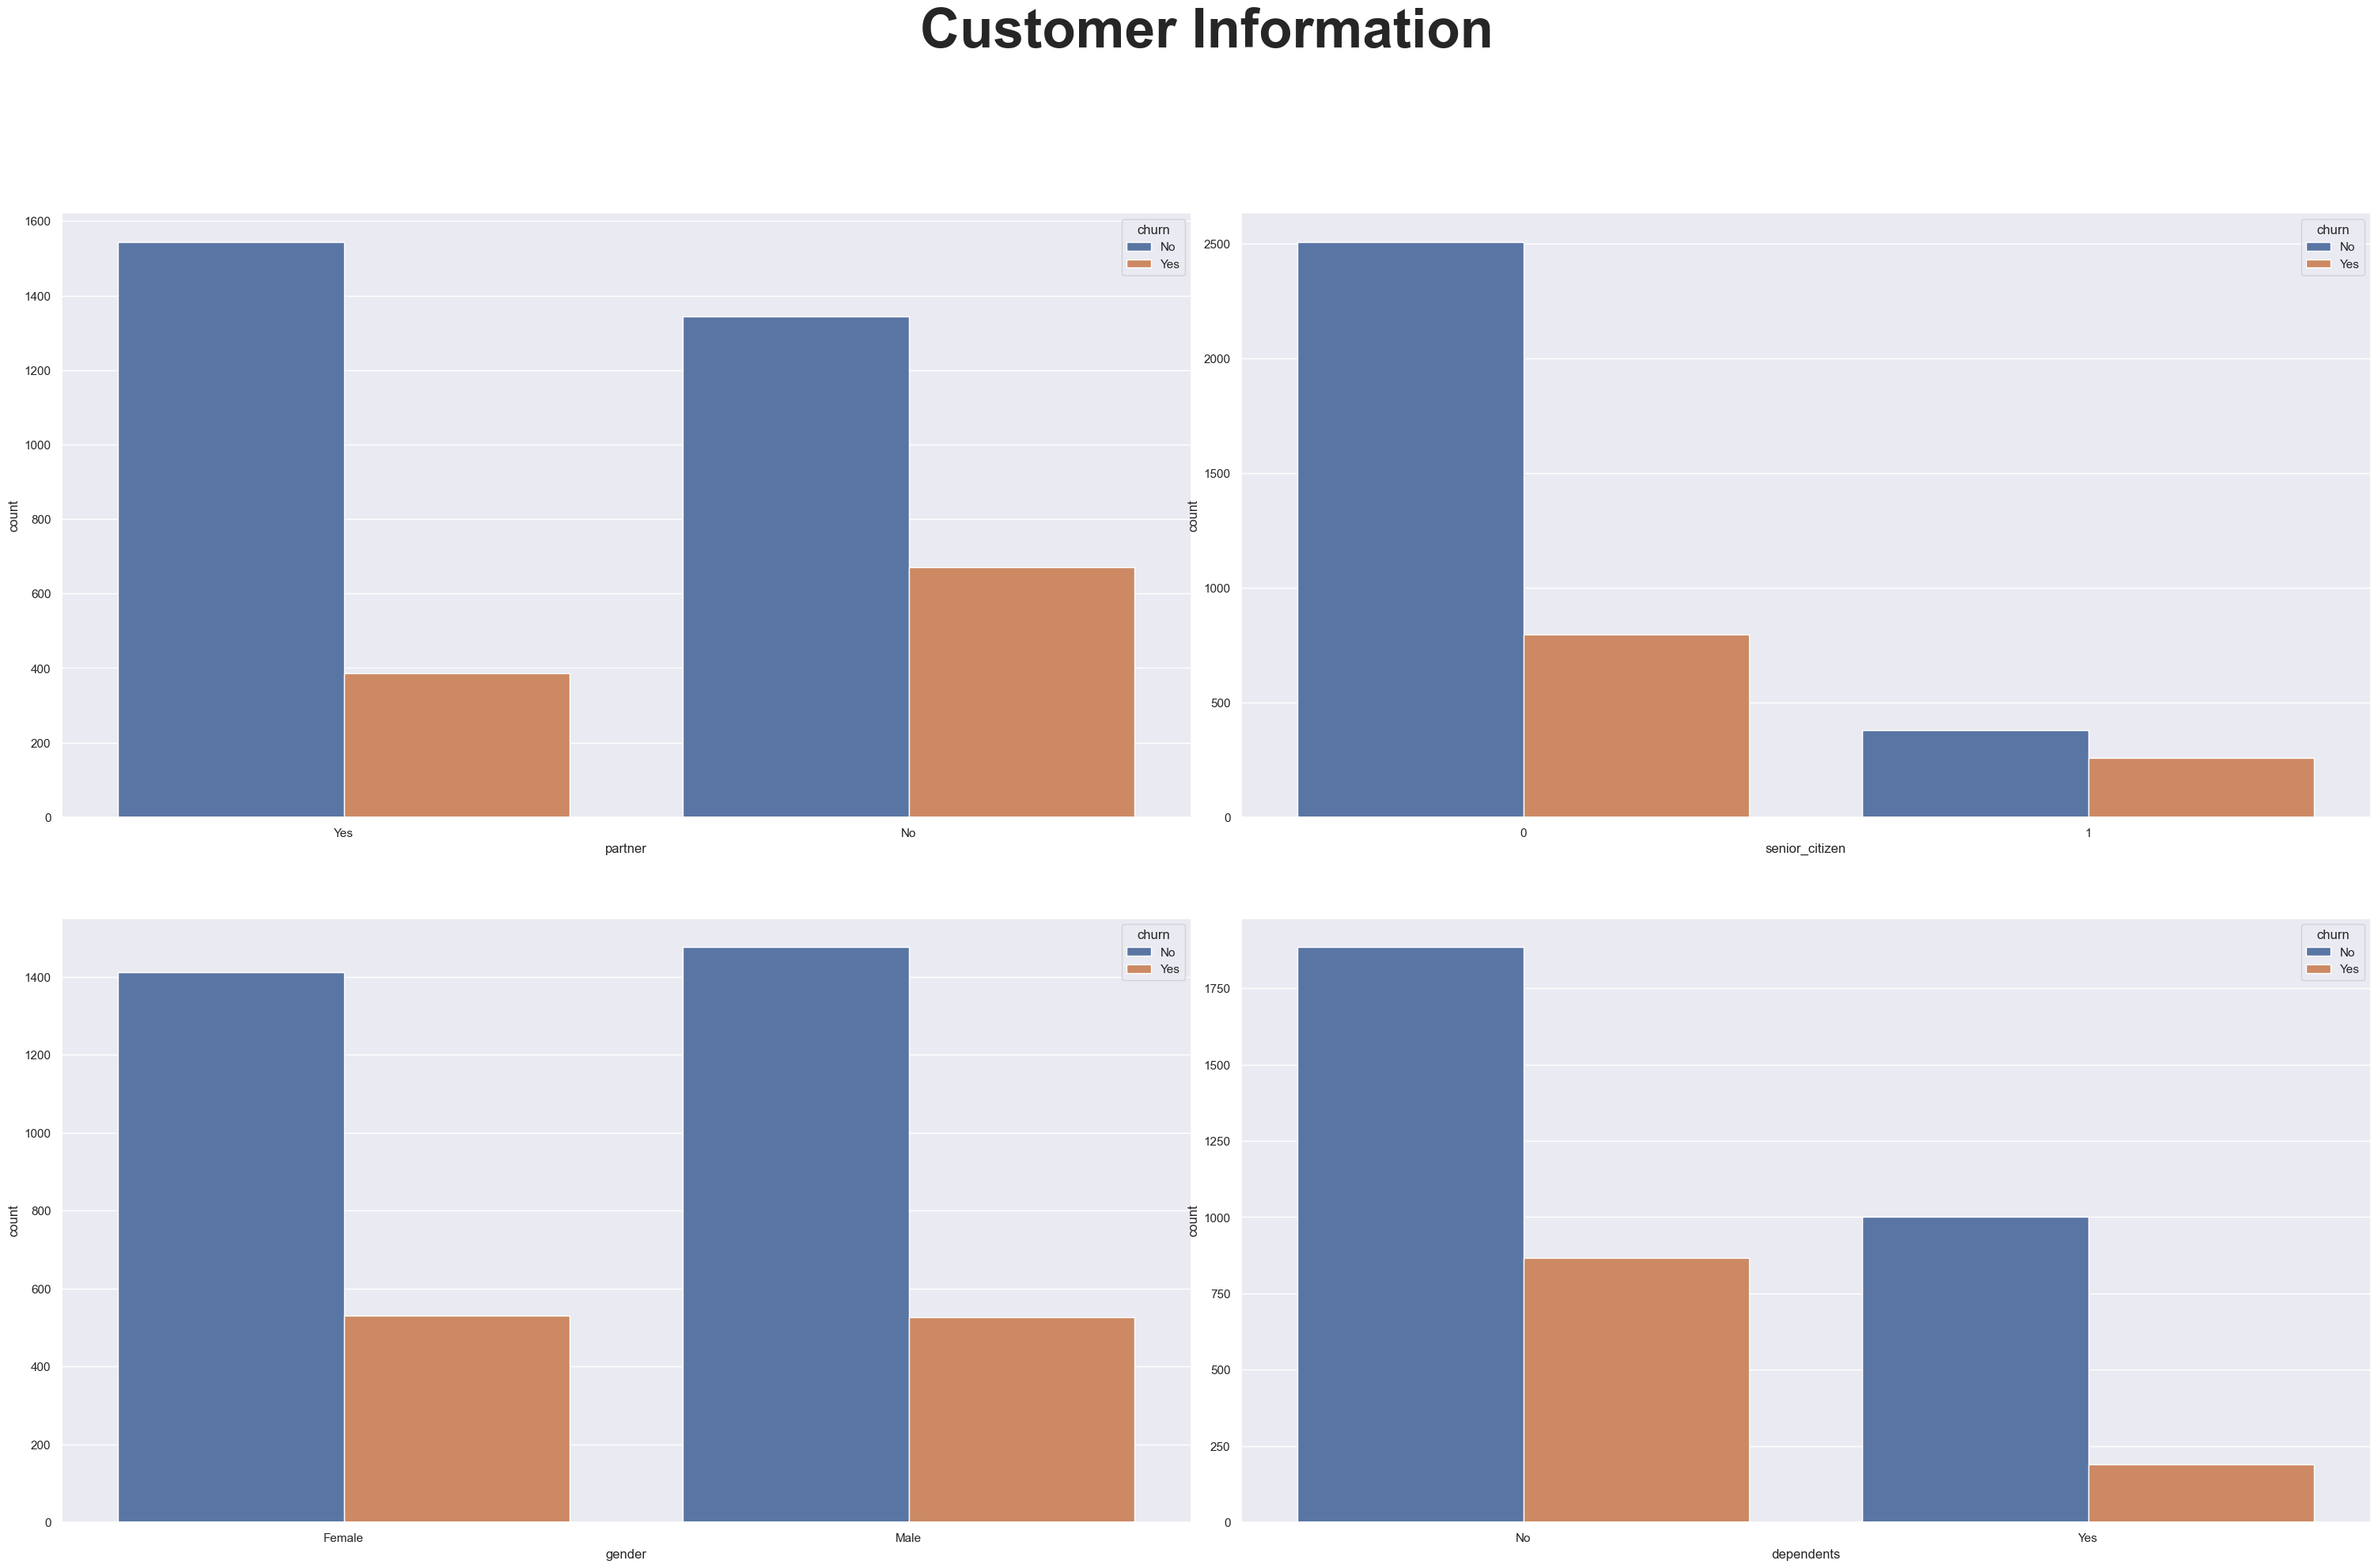

In [30]:
#set seaborn plotting aesthetics as default
fig = plt.figure(figsize=(50, 40)) 
plt.rcParams['savefig.facecolor'] = "0.4"
plt.rcParams['figure.figsize'] = 30., 20.
plt.rcParams['figure.max_open_warning'] = 500

sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(nrows=2, ncols=2, layout="constrained")
fig.tight_layout(h_pad=7)



#create boxplot in each subplot
sns.countplot(data=train, hue='churn', x='gender', ax=axes[1,0])
sns.countplot(data=train, hue='churn', x='senior_citizen', ax=axes[0,1])
sns.countplot(data=train, hue='churn', x='partner', ax=axes[0,0])
sns.countplot(data=train, hue='churn', x='dependents', ax=axes[1,1])

fig.suptitle('Customer Information', fontweight='bold', size=50)
plt.subplots_adjust(top=0.85)

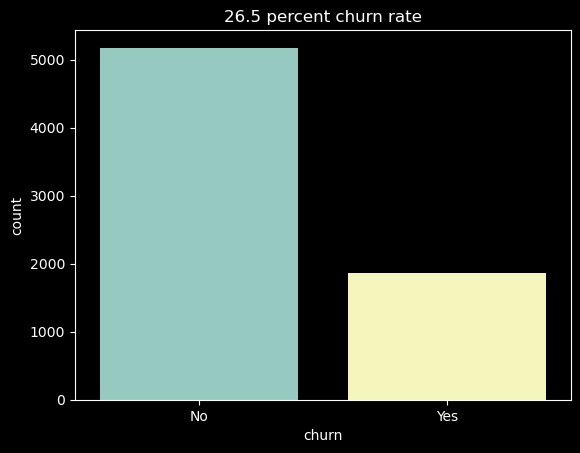

In [5]:
# how many customers churned? 

sns.countplot(data=df, x='churn')
plt.title("26.5 percent churn rate")
plt.show()

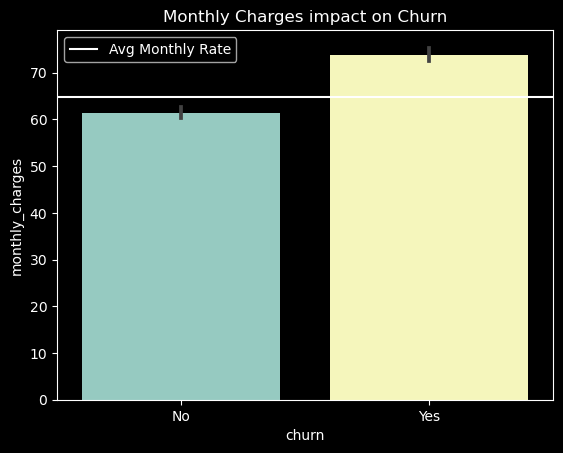

In [6]:
# Do monthly charges impact churn? If so does that change depending on contract type? 

sns.barplot(x='churn', y='monthly_charges', data=train)

avg_monthly_rate = train.monthly_charges.mean()
plt.axhline(avg_monthly_rate, label='Avg Monthly Rate')
plt.legend(loc='upper left')

plt.title('Monthly Charges impact on Churn')
plt.show()

#### plot monthy charges to churn and we do not have a lagre vizual difference 

#### we perform a chi squared test to see if there is a relationship

In [7]:
from explore import chi_squared

null = "monthly charges and churn of ticket are independent"
alt = "there is a relationship between churn and monthly charges"

chi_squared(null, alt, train.churn, train.monthly_charges)

monthly_charges,18.25,18.40,18.70,18.80,18.85,18.90,18.95,19.00,19.05,19.10,...,116.55,116.60,116.80,117.15,117.45,117.60,118.35,118.60,118.65,118.75
churn,,,,,,,,,,,,,,,,,,,,,
No,1,1,2,4,3,1,2,3,9,6,...,1,1,1,1,0,1,0,2,1,1
Yes,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0


Reject the null hypothesis that monthly charges and churn of ticket are independent
Sufficient evidence to move forward understanding that there is a relationship between churn and monthly charges
 
p = 2.0741791404838627e-08


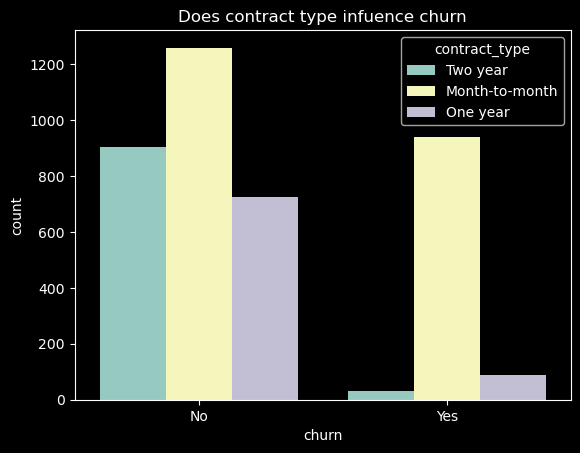

In [8]:
sns.countplot(data = train, x= 'churn', hue = 'contract_type')
plt.title('Does contract type infuence churn')
plt.show()

#### plot Contract Types and churn

#### can see a large number of customers churning on month to month 

#### perform a chi squared test to see if there is a realationship

In [9]:
null = "contract type and churn of ticket are independent"
alt = "there is a relationship between churn and contract type"

chi_squared(null, alt, train.churn, train.contract_type)

contract_type,Month-to-month,One year,Two year
churn,,,
No,1258,726,903
Yes,939,87,30


Reject the null hypothesis that contract type and churn of ticket are independent
Sufficient evidence to move forward understanding that there is a relationship between churn and contract type
 
p = 2.400667548360687e-143


<Axes: xlabel='multiple_lines', ylabel='phone_service_encoded'>

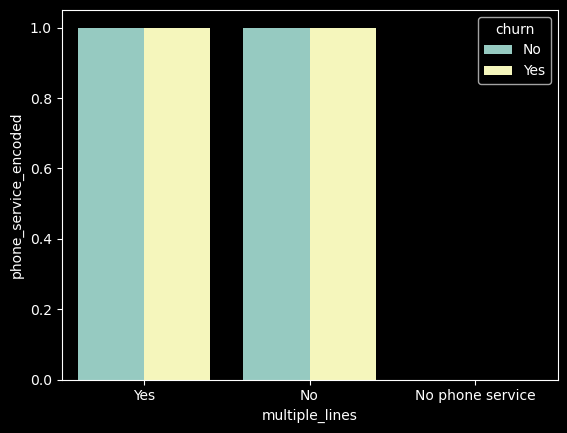

In [10]:
sns.barplot(y='phone_service_encoded', x='multiple_lines', data=train, hue='churn')

#### plot multiple lines and phone service

#### can visually there is no difference 

#### perform a chi squared test to see of there is any relationship

In [11]:
null = "customers with phone service and churn are independent"
alt = "there is a relationship between customers with phone service and churn"

chi_squared(null, alt, train.churn, train.phone_service)

phone_service,No,Yes
churn,,
No,289,2598
Yes,99,957


Fail to reject the null
Insufficient evidence to reject the null
 
p = 0.5941763447086441


# Exploration Summary

"Contract Type" was found to be a driver of "Churn"

"Payment Type" was found to be a driver of "Chrun"

"Internet Service Type" ws found to be a driver of "Churn"

* "Phone Service" was not found to be a driver of churn
* "Multipul Lines" was not found to be a driver of chrun   
* "Gender" was not found to be a driver of churn 

In [12]:
telco_drop = ['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'churn_encoded', 'contract_type', 'internet_service_type', 'payment_type', 'gender_encoded', 'phone_service_encoded',
       'multiple_lines_No phone service', 'multiple_lines_Yes']

telco_keep = ['partner_encoded', 'dependents_encoded','paperless_billing_encoded', 'online_security_No internet service', 'online_security_Yes', 
       'online_backup_No internet service', 'online_backup_Yes', 'device_protection_No internet service', 'device_protection_Yes', 
       'tech_support_No internet service', 'tech_support_Yes', 'streaming_tv_No internet service', 'streaming_tv_Yes', 
       'streaming_movies_No internet service', 'streaming_movies_Yes', 'contract_type_One year', 'contract_type_Two year', 
       'internet_service_type_Fiber optic', 'internet_service_type_No internet service',
       'payment_type_Credit card (automatic)', 'payment_type_Electronic check', 'payment_type_Mailed check']

# Modeling

## Baseline

In [13]:
baseline_prediction = train.churn_encoded.mode()

baseline_accuracy = (train.churn_encoded == 0).mean()

print(f'Baseline prediction -> {baseline_prediction}')

print(f'Baseline accuracy -> { baseline_accuracy}')

Baseline prediction -> 0    0
Name: churn_encoded, dtype: int64
Baseline accuracy -> 0.7321836165356328


## baseline to beat is 0.73

### Prep my data for modeling

In [14]:
# Split data into X and Y data sets 

X_train = train.drop(columns=telco_drop) 

X_validate = validate.drop(columns=telco_drop) 

X_test = test.drop(columns=telco_drop)   

y_train = train.churn_encoded 

y_validate = validate.churn_encoded

y_test = test.churn_encoded 

# Decision Tree

In [15]:
m.dis_tree(X_train, X_validate, y_train, y_validate)

Accuracy of Decision Tree on train data is 0.7522191224955618
Accuracy of Decision Tree on validate data is 0.745712596096984


In [16]:
for x in range(1,20):
#     print(x)
    clf = DecisionTreeClassifier(max_depth=x, random_state=123)
    clf.fit(X_train, y_train)
    acc = clf.score(X_train, y_train)
    print(f'for depth of {x:2}, the accuracy is {round(acc,2)}')

for depth of  1, the accuracy is 0.73
for depth of  2, the accuracy is 0.73
for depth of  3, the accuracy is 0.75
for depth of  4, the accuracy is 0.77
for depth of  5, the accuracy is 0.77
for depth of  6, the accuracy is 0.78
for depth of  7, the accuracy is 0.79
for depth of  8, the accuracy is 0.8
for depth of  9, the accuracy is 0.81


for depth of 10, the accuracy is 0.82
for depth of 11, the accuracy is 0.84
for depth of 12, the accuracy is 0.85
for depth of 13, the accuracy is 0.87
for depth of 14, the accuracy is 0.87
for depth of 15, the accuracy is 0.87
for depth of 16, the accuracy is 0.88
for depth of 17, the accuracy is 0.88
for depth of 18, the accuracy is 0.88
for depth of 19, the accuracy is 0.88


In [17]:
scores_all = []

for x in range(1,20):

    clf = DecisionTreeClassifier(max_depth=x, random_state=123)
    clf.fit(X_train, y_train)
    
    # evaluate on train
    train_acc = clf.score(X_train, y_train)
    
    #evaluate on validate
    val_acc = clf.score(X_validate, y_validate)
    
    scores_all.append([x, train_acc, val_acc])
    
scores_df = pd.DataFrame(scores_all, columns=['max_depth','train_acc','val_acc'])
scores_df = pd.DataFrame(scores_all, columns=['max_depth','train_acc','val_acc'])
scores_df.sort_values(by=['val_acc'], ascending=False).head()

,max_depth,train_acc,val_acc
4,5,0.772762,0.776464
3,4,0.766675,0.772915
6,7,0.786203,0.770550
5,6,0.779863,0.765228
7,8,0.797616,0.756357


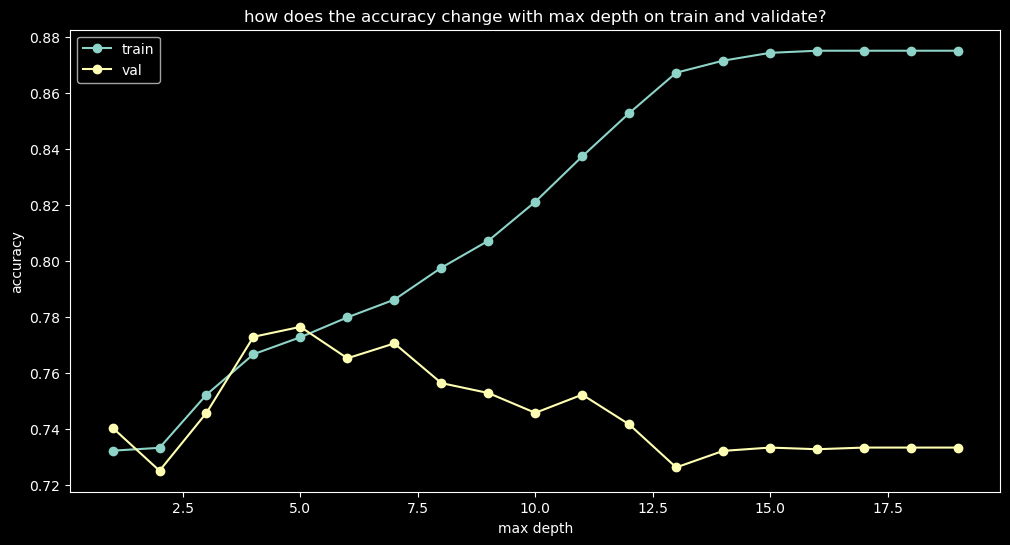

In [18]:
plt.figure(figsize=(12,6))
plt.plot(scores_df.max_depth, scores_df.train_acc, label='train', marker='o')
plt.plot(scores_df.max_depth, scores_df.val_acc, label='val', marker='o')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('how does the accuracy change with max depth on train and validate?')
plt.legend()
plt.show()

### Best model giving us an accuracy score of .77 on our validate data

# Random Forest

In [19]:
# Accuracy Score: 0.7792760823278921
m.rand_forest(X_train, X_validate, y_train, y_validate)

Accuracy of Random Forest on train is 0.7321836165356328
Accuracy of Random Forest on validate is 0.7403903015966884


In [24]:
scores_all = []

for x in range(1,11):
    
    # looping through min_samples_leaf front to back 
    # looping through max_depth back to front
    rf = RandomForestClassifier(random_state=123, min_samples_leaf=x, max_depth=11-x) # different if x = 10 vs x = 1
    #fit it
    rf.fit(X_train, y_train)
    #transform it
    train_acc = rf.score(X_train, y_train)
    
    #evaluate on my validate data
    val_acc = rf.score(X_validate, y_validate)
    
    print(f'min_samples_leaf = {x} max_depth = {11-x}, accuracy = {train_acc, val_acc}')
    
    scores_all.append([x, 11-x, train_acc, val_acc])

scores_df = pd.DataFrame(scores_all, columns=['min_sample_leaf', 'max_depth','train_acc','val_acc'])
scores_df = pd.DataFrame(scores_all, columns=['min_sample_leaf', 'max_depth','train_acc','val_acc'])
scores_df.sort_values(by=['val_acc'], ascending=False).head()

min_samples_leaf = 1 max_depth = 10, accuracy = (0.8255135683489728, 0.7829686575990538)
min_samples_leaf = 2 max_depth = 9, accuracy = (0.8004057823991885, 0.7806031933767001)
min_samples_leaf = 3 max_depth = 8, accuracy = (0.7884859244230281, 0.7806031933767001)
min_samples_leaf = 4 max_depth = 7, accuracy = (0.7851889424296221, 0.7829686575990538)
min_samples_leaf = 5 max_depth = 6, accuracy = (0.7803702764392595, 0.7794204612655233)
min_samples_leaf = 6 max_depth = 5, accuracy = (0.77859497844281, 0.781785925487877)
min_samples_leaf = 7 max_depth = 4, accuracy = (0.7760588384478824, 0.7764636309875813)
min_samples_leaf = 8 max_depth = 3, accuracy = (0.7321836165356328, 0.7403903015966884)
min_samples_leaf = 9 max_depth = 2, accuracy = (0.7321836165356328, 0.7403903015966884)
min_samples_leaf = 10 max_depth = 1, accuracy = (0.7321836165356328, 0.7403903015966884)


,min_sample_leaf,max_depth,train_acc,val_acc
0,1,10,0.825514,0.782969
3,4,7,0.785189,0.782969
5,6,5,0.778595,0.781786
1,2,9,0.800406,0.780603
2,3,8,0.788486,0.780603


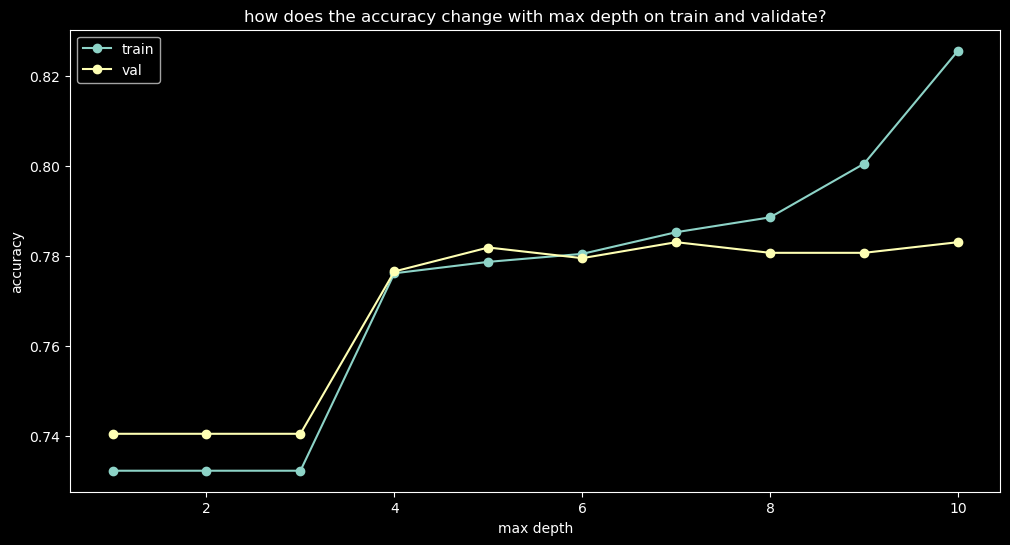

In [25]:
plt.figure(figsize=(12,6))
plt.plot(scores_df.max_depth, scores_df.train_acc, label='train', marker='o')
plt.plot(scores_df.max_depth, scores_df.val_acc, label='val', marker='o')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('how does the accuracy change with max depth on train and validate?')
plt.legend()
plt.show()

### best accuracy score is .78 on our validate data 

# Logistic Regression

In [21]:
# Accuracy: 0.80
m.log_reg(X_train, X_validate, y_train, y_validate)

Accuracy of Logistic Regression on train is 0.777580522444839
Accuracy of Logistic Regression on validate is 0.7936132465996452


### accuracy of train is lower than my accuracy for validate

# KNN

In [22]:
# Accuracy: 0.8196804463606391
m.get_knn(X_train, X_validate, y_train, y_validate)

Accuracy of Logistic Regression on train is 0.8148617803702765
Accuracy of Logistic Regression on validate is 0.7534003548196333


In [26]:
scores_all = []

for x in range(1,10):

    knn = KNeighborsClassifier(n_neighbors=x)
    knn.fit(X_train, y_train)
    
    # evaluate on train
    train_acc = knn.score(X_train, y_train)
    
    #evaluate on validate
    val_acc = knn.score(X_validate, y_validate)
    
    scores_all.append([x, train_acc, val_acc])
    
scores_df = pd.DataFrame(scores_all, columns=['max_depth','train_acc','val_acc'])
scores_df = pd.DataFrame(scores_all, columns=['max_depth','train_acc','val_acc'])
scores_df.sort_values(by=['val_acc'], ascending=False).head()

,max_depth,train_acc,val_acc
3,4,0.809536,0.764636
5,6,0.809029,0.756949
8,9,0.800659,0.756949
4,5,0.814862,0.753400
6,7,0.803196,0.749852


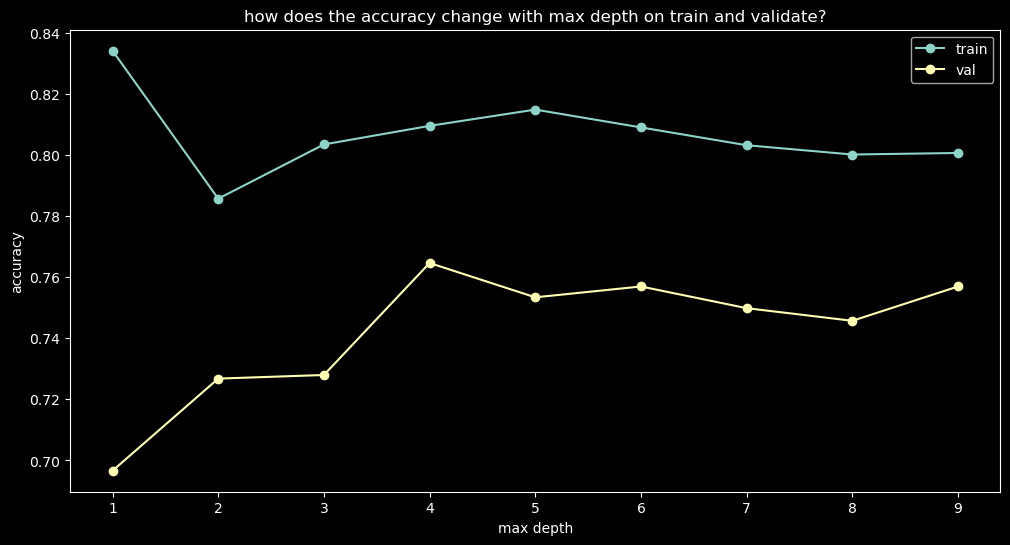

In [27]:
plt.figure(figsize=(12,6))
plt.plot(scores_df.max_depth, scores_df.train_acc, label='train', marker='o')
plt.plot(scores_df.max_depth, scores_df.val_acc, label='val', marker='o')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('how does the accuracy change with max depth on train and validate?')
plt.legend()
plt.show()

### best accuracy score of .76 on our validate data

# Best model

In [44]:
clf = DecisionTreeClassifier(max_depth=7, random_state=123)
clf.fit(X_train, y_train)
    
# evaluate on train
train_acc = clf.score(X_train, y_train)
    
#evaluate on validate
val_acc = clf.score(X_validate, y_validate)

test_acc = clf.score(X_test, y_test)
    
scores_all.append([x, train_acc, val_acc, test_acc])
    
scores_df = pd.DataFrame(scores_all, columns=['max_depth','train_acc','val_acc', 'test_acc'])
scores_df = pd.DataFrame(scores_all, columns=['max_depth','train_acc','val_acc', 'test_acc'])
scores_df.sort_values(by=['val_acc'], ascending=False).head()

,max_depth,train_acc,val_acc,test_acc
4,5,0.772762,0.776464,0.793471
3,4,0.766675,0.772915,0.791341
19,19,0.786203,0.770550,0.773598
6,7,0.786203,0.770550,0.773598
5,6,0.779863,0.765228,0.763662


# Comparing Models

- My best model being the Decision Tree
- All models have performed better than baseline on train and validate
- The KNN model had the largest gap between train and validata 



# Conclusions
- Get customers on one to two year plans because most customers churn before the first year is up
- Update customer payment type and promot auto pay
- Run promotions to upgrade existing customers internet service 

# Recomendations 
- narrow down the feature values more to help with over fitting
- continue to collect data to imporve future models